# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados. Caso seja identificado, **nota zero** será atribuída à todos os envolvidos.
*   Data de entrega: **21/10/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Imports iniciais

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Definição de um model simples para testes usando sklearn

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Carregando e Divisão de Dados

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

## Validação cruzada

### Holdout

##################################################
Exemplos de Dados
##################################################
X1 - Train Features: 
 [[5.4 3.9 1.7 0.4]
 [6.1 3.  4.9 1.8]
 [6.7 3.1 5.6 2.4]]
X1 - Shape (Linhas X Colunas): (105, 4)
##################################################
y1 - Train Target: 
 [0 2 2]
y1 - Shape (Linhas X Colunas): (105,)
##################################################
X2 - Test Features: 
 [[5.8 2.7 5.1 1.9]
 [5.  2.  3.5 1. ]
 [5.7 3.  4.2 1.2]]
X2 - Shape (Linhas X Colunas): (45, 4)
##################################################
y2 - Test Target: 
 [2 1 1]
y2 - Shape (Linhas X Colunas): (45,)
##################################################
ACC TRAINING: 0.9714285714285714
ACC TEST: 0.9555555555555556
##################################################
Outras Metricas
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        14
           2

Text(91.68, 0.5, 'predicted label')

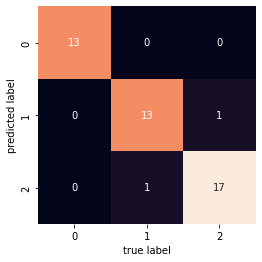

In [27]:
# defina a separação dos dados (X, y) utilizando 70% para treino e 30% para teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando os dados em teste/train holding out 30% = 0.3 of the data for testing
X1, X2, y1, y2 = train_test_split(x,y,test_size=0.3) # TODO

# vizualizar amostras dos dados
print('#'*50)
print('Exemplos de Dados')
print('#'*50)
print('X1 - Train Features: \n',X1[:3])
print(f'X1 - Shape (Linhas X Colunas): {X1.shape}')
print('#'*50)
print('y1 - Train Target: \n',y1[:3])
print(f'y1 - Shape (Linhas X Colunas): {y1.shape}')
print('#'*50)
print('X2 - Test Features: \n',X2[:3])
print(f'X2 - Shape (Linhas X Colunas): {X2.shape}')
print('#'*50)
print('y2 - Test Target: \n',y2[:3])
print(f'y2 - Shape (Linhas X Colunas): {y2.shape}')
print('#'*50)

# TODO: treine e avalie o modelo com os dados separados

# treine com os valores de treinameto
model.fit(X1,y1)

# Predizer valores apartir das features de teste/train
predicaoTrain = model.predict(X1)
predicaoTeste = model.predict(X2)

# Calcular acuracia com a função score
#acuraciaTrain = model.score(X1,y1)
#acuraciaTeste = model.score(X2,y2)
## Accuracia no treinamento e no teste
#print(f"ACC TRAINING: {acuraciaTrain}")
#print(f"ACC TEST: {acuraciaTeste}")
#print('#'*50)

# Calcular acuracia apartir das predições com a função accuracy_score
acc_train = accuracy_score(y1, predicaoTrain)
acc_test = accuracy_score(y2, predicaoTeste)


# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acc_train}")
print(f"ACC TEST: {acc_test}")
print('#'*50)

# Outras metricas
from sklearn.metrics import classification_report
print(f"Outras Metricas")
print(classification_report(y2, predicaoTeste))
print('#'*50)

from sklearn.metrics import confusion_matrix
import seaborn as sns
MatrixConfusao = confusion_matrix(y2, predicaoTeste)
sns.heatmap(MatrixConfusao.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### K-Folds

É possível usar o módulo [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) do sklearn

In [28]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
folds = 3
# TODO: defina aqui a chamada
cross_validation = cross_val_score(model, x, y, cv=folds)
print(f'Cross Validation Score: {cross_validation}')

Cross Validation Score: [0.98 0.96 0.98]


Ou até expandir para executar o K vezes, seguindo um processo manual

In [29]:
from sklearn.model_selection import KFold
x_times = 3
k_folds = 3

for k in range(x_times):
    splits = KFold(n_splits=k_folds, shuffle=True)
    print('Splits: ',splits)
    # a chamada .split() retorna os índices que devem ser usados em cada rodada
    count1 = 0
    for train, test in splits.split(x):
        
        train_data = x[train]
        train_target = y[train]
        test_data = x[test]
        test_target = y[test]   

      # TODO: Treino e avaliação
    
        model.fit(train_data,train_target)
        print(f'Tentativa {k} Score {count1}: {model.score(test_data,test_target)}')
        #X1, X2, y1, y2 = x[train], x[test], y[train], y[test]
        #model.fit(X1,y1)
        #print(f'Second Split Score: {model.score(X2,y2)}')
    
        count1+=1


Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Tentativa 0 Score 0: 0.98
Tentativa 0 Score 1: 0.98
Tentativa 0 Score 2: 1.0
Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Tentativa 1 Score 0: 0.94
Tentativa 1 Score 1: 1.0
Tentativa 1 Score 2: 0.96
Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Tentativa 2 Score 0: 0.98
Tentativa 2 Score 1: 0.98
Tentativa 2 Score 2: 0.94


# Regressão Linear

Geração aleatória de um conjunto de dados simples

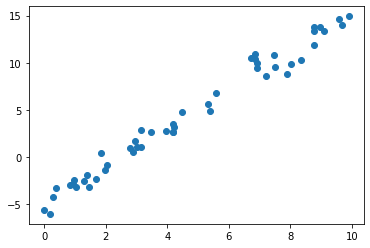

In [30]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Importação e utilização do módulo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  para fazer um ajuste linear as dados gerados

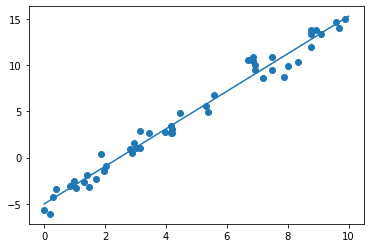

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit);

Agora, considere a implementação da Regressão Linear do zero, sem o uso do `sklearn` ou outra biblioteca de Machine Learninng.

In [32]:
# TODO:
# formula da regressão linear y = m*x + b 
# y - valor a predizer/target
# m - slope a descobrir?
# x - variaveis independentes/data/features
# b - bias a descobrir?

import pandas as pd
print(f'Exemplos de dados: X {x[:3]} Y {y[:3]}')
# Criando um dataframe de dados x - y
df = pd.DataFrame({'x':x, 'y':y})
df.head()

Exemplos de dados: X [4.17022005e+00 7.20324493e+00 1.14374817e-03] Y [ 2.65326739  8.56128423 -5.66895863]


,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193


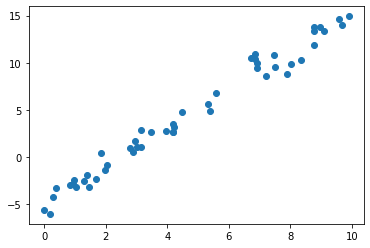

In [33]:
plt.scatter(df['x'],df['y'])

In [34]:
# valores necessarios para calcular o slope e o intercept

# media das variaveis independentes
xmean = df['x'].mean()

# diferencça entre os valores e a media
df['Diferenca x - xMedia'] = xmean - df['x']

# diferença entre os valoers e a media, ao quadrado
df['Quadrado da Diferenca X'] = df['Diferenca x - xMedia']**2

# somatorio dessa difenreça ao quadrado
somatorioX = df['Quadrado da Diferenca X'].sum()

# media do target
ymean = df['y'].mean()

# diferenca entre os valores do target e sua media
df['Diferenca Y - yMedia'] = ymean - df['y']

# somatorio do produto das diferenças
somatorioProdutoDiferencas = (df['Diferenca x - xMedia']*df['Diferenca Y - yMedia']).sum()
df.head()

,x,y,Diferenca x - xMedia,Quadrado da Diferenca X,Diferenca Y - yMedia
0,4.170220,2.653267,0.499536,0.249536,1.814726
1,7.203245,8.561284,-2.533489,6.418566,-4.093291
2,0.001144,-5.668959,4.668612,21.795940,10.136952
3,3.023326,1.033987,1.646430,2.710733,3.434007
4,1.467559,-3.182193,3.202197,10.254066,7.650186


In [35]:
slope = somatorioProdutoDiferencas/somatorioX
print(f'slope Valor: {slope}')
intercept = ymean - slope*xmean
print(f'Intercept: {intercept}')

slope Valor: 2.0272088103606962
Intercept: -4.998577085553209


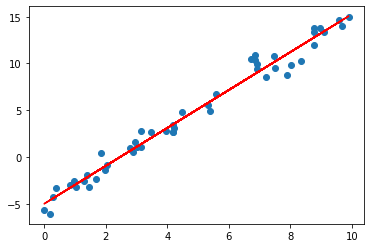

In [36]:
linhaPredicao = slope*df['x'] + intercept
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],linhaPredicao, 'r')

# Máquinas de Vetores de Suporte

Geração de dados iniciais

(50, 2) (50,)


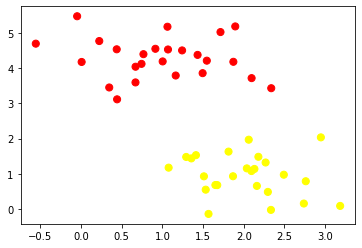

In [37]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
print(X.shape,y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Para definir o modelo, podemos usar módule [`SVC (Support Vector Classifier)`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) do [`sklearn.svm`](https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.)

In [38]:
from sklearn.svm import SVC

Com teste inicial, podemos treinar e avaliar um modelo com um kernel linear

In [39]:
# TODO: separação dos dados X, y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(metrics.accuracy_score(model.predict(X_test), y_test))

1.0


E para problemas não lineares?

Geração de dados

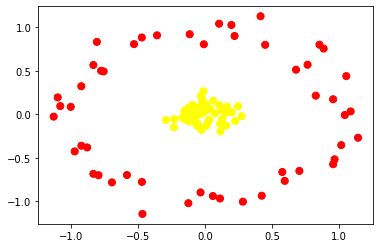

In [41]:
#from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

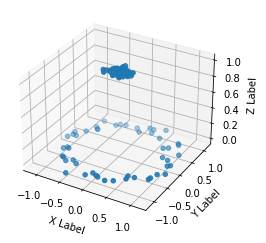

In [42]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

eixoX0 = []
eixoX1 = []
for value in X:
    eixoX0.append(value[0])
    eixoX1.append(value[1])


ax.scatter(eixoX0, eixoX1,y)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

A partir da visualização anterior dos dados, encontre a melhor configuração para um modelo `SVM` (lembrem-se do `truque do kernel` -- variem este parâmetro [`rbf`, `poly`, `sigmoid`, etc]). Para isso, façam testes paramétricos e avaliem o resultado obtido.

Dica: é possível plotar os vetores de suporte para entender o comportamento após treinamento. Vejam o `model.support_vectors`

0.5666666666666667


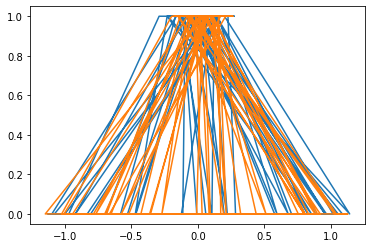

In [45]:
# TODO: 
# [`rbf`, `poly`, `sigmoid`, etc]

# Usar o pipeline/grid search para testar diferentes kernels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

kernels = ['rbf','poly','sigmoid','linear']
model1 = SVC(kernel='rbf')
model1.fit(X_train, y_train)
print(metrics.accuracy_score(model.predict(X_test), y_test))

plt.plot(X,y)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC())
    ])
polynomial_svm_clf.fit(X_train, y_train)
predPolySVM = polynomial_svm_clf.predict(X_test)

print(f'Score: {accuracy_score(y_test, predPolySVM)}')


Score: 1.0


In [64]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", degree=3, coef0=1, C=1))
    ])
poly_kernel_svm_clf.fit(X_train ,y_train)
predPolySVMKernel = poly_kernel_svm_clf.predict(X_test)

print(f'Score: {accuracy_score(y_test, predPolySVMKernel)}')


Score: 1.0


# Árvores de decisão: classificação de dígitos

Carregamento dos dados

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()

ACC TRAINING: 1.0
ACC TEST: 0.8444444444444444
##################################################
Outras Metricas
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.76      0.74      0.75        53
           2       0.80      0.85      0.83        62
           3       0.90      0.78      0.84        60
           4       0.82      0.81      0.81        57
           5       0.94      0.88      0.91        58
           6       0.94      0.96      0.95        52
           7       0.87      0.83      0.85        48
           8       0.77      0.76      0.76        45
           9       0.69      0.87      0.77        53

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.85       540

##################################################


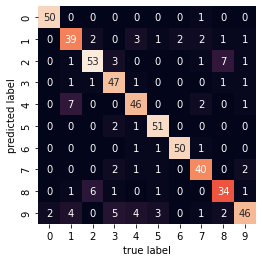

In [47]:
# TODO: façam a separação dos dados utilizando um conjunto holdout 70/30
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,digits.target,test_size=0.3)

# TODO: treinem o modelo
from sklearn.tree import DecisionTreeClassifier

modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(Xtrain,ytrain)

# TODO: avaliem o resultado

# Predizer valores apartir das features de teste/train
predicaoTreeTrain = modelDecisionTree.predict(Xtrain)
predicaoTreeTeste = modelDecisionTree.predict(Xtest)

# Calcular acuracia com a função score
# acuraciaTreeTrain = modelDecisionTree.score(Xtrain,ytrain)
# acuraciaTreeTeste = modelDecisionTree.score(Xtest,ytest)

# Accuracia no treinamento e no teste
#print(f"ACC TRAINING: {acuraciaTreeTrain}")
#print(f"ACC TEST: {acuraciaTreeTeste}")

# Calcular acuracia apartir das predições com a função accuracy_score
acc_train = accuracy_score(ytrain, predicaoTreeTrain)
acc_test = accuracy_score(ytest, predicaoTreeTeste)


# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acc_train}")
print(f"ACC TEST: {acc_test}")
print('#'*50)

# Outras metricas
from sklearn.metrics import classification_report
print(f"Outras Metricas")
print(classification_report(ytest, predicaoTreeTeste))
print('#'*50)

from sklearn.metrics import confusion_matrix
import seaborn as sns
MatrixConfusao = confusion_matrix(ytest, predicaoTreeTeste)
sns.heatmap(MatrixConfusao.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Ensemble

Escolha pelo menos 2 modelos discutidos para fazer um ensemble utilizando o mesmo conjunto de dados do exemplo anterior

In [50]:
# TODO:
from sklearn.datasets import load_digits


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

digits = load_digits()

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,digits.target,test_size=0.3)

#log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
#dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
estimators=[('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')

voting_clf2 = VotingClassifier(
estimators=[('rf', rnd_clf), ('svc', svm_clf)],
voting='soft')

voting_clf.fit(Xtrain, ytrain)
voting_clf2.fit(Xtrain,ytrain)

pred = voting_clf.predict(Xtest)
pred2 = voting_clf2.predict(Xtest)

print('Ensemble')
print(f'Voting Classifier Hard Score: {accuracy_score(ytest,pred)}')
print(f'Voting Classifier Soft Score: {accuracy_score(ytest,pred2)}')

print('#'*50)
print('Sem Ensemble')
classifiers = [rnd_clf,svm_clf]

for clf in classifiers:

    clf.fit(Xtrain, ytrain)

    y_pred = clf.predict(Xtest)

    print(clf.__class__.__name__,'Score', accuracy_score(ytest, y_pred))




Ensemble
Voting Classifier Hard Score: 0.9796296296296296
Voting Classifier Soft Score: 0.9888888888888889
##################################################
Sem Ensemble
RandomForestClassifier Score 0.9666666666666667
SVC Score 0.9833333333333333
